tensor([ 0.0000e+00,  2.8815e-01,  4.7097e-01,  ..., -4.7097e-01,
        -2.8815e-01,  1.9644e-15])


/data2/hh/anaconda3/envs/trajectoryZSL/lib/python3.9/site-packages/torch/functional.py:704: UserWarning: stft with return_complex=False is deprecated. In a future pytorch release, stft will return complex tensors for all inputs, and return_complex=False will raise an error.
Note: you can still call torch.view_as_real on the complex output to recover the old return format. (Triggered internally at ../aten/src/ATen/native/SpectralOps.cpp:873.)
  return _VF.stft(  # type: ignore[attr-defined]
/tmp/ipykernel_2763197/1488607.py:28: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3683.)
  plt.imshow(magnitude.T.numpy(), aspect='auto', origin='lower', extent=[0, 1, 0, fs / 2])


TypeError: Invalid shape (2, 9, 129) for image data

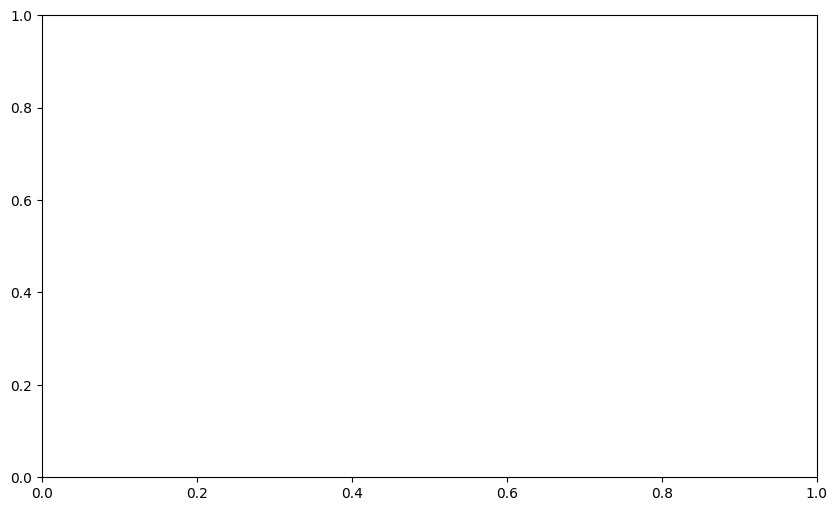

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 生成一个示例信号：1秒的正弦波
fs = 1024  # 采样频率
t = np.linspace(0, 1, fs)
signal = .5 * np.sin(2 * np.pi * 100 * t)  # 100Hz 正弦波

# 转换为 PyTorch 张量
signal_tensor = torch.tensor(signal, dtype=torch.float32)
print(signal_tensor)
# STFT 参数
n_fft = 256
hop_length = 128
win_length = 256
window = torch.hann_window(win_length)

# 计算 STFT
stft_result = torch.stft(signal_tensor, n_fft=n_fft, hop_length=hop_length,
                         win_length=win_length, window=window, return_complex=True)

# 获取幅度谱
magnitude = torch.abs(stft_result)

# 绘制 STFT 幅度谱
plt.figure(figsize=(10, 6))
plt.imshow(magnitude.T.numpy(), aspect='auto', origin='lower', extent=[0, 1, 0, fs / 2])
plt.colorbar(label='Magnitude')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('STFT Magnitude Spectrum')
plt.show()

In [8]:
import torch

# 示例数据
x = torch.tensor([[1., 2., 1.], [1., 2., 2.], [1., 2., 3.]])  # 待计算的向量
C = torch.tensor([[1., 1., 1.], 
                  [2., 2., 2.], 
                  [3., 3., 3.]])  # 聚类中心矩阵 (每行是一个中心)

# 计算协方差矩阵 S
# 为示例，假设 S 是单位矩阵
S = torch.cov(x)
print(S)
# 计算 S 的逆
S_inv = torch.inverse(S)
print(S_inv)

# 计算每个马氏距离
distances = []
for center in C:
    diff = x - center  # x - c
    distance = torch.sqrt(diff @ S_inv @ diff.T)  # 马氏距离
    distances.append(distance)

# 转换为张量
distances = torch.tensor(distances)

print("Mahalanobis distances:", distances)


tensor([[0.3333, 0.1667, 0.0000],
        [0.1667, 0.3333, 0.5000],
        [0.0000, 0.5000, 1.0000]])
tensor([[ -8388607.,  16777218.,  -8388609.],
        [ 16777218., -33554432.,  16777216.],
        [ -8388609.,  16777216.,  -8388607.]])


ValueError: only one element tensors can be converted to Python scalars